# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import os

# Set the number of threads for OpenMP to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data_path = 'Wholesale_Data.csv'  # Adjusted path for the main folder
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
display(data.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
# Display data types and basic info
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Display summary statistics
print("\nSummary Statistics:")
display(data.describe())


Summary Statistics:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


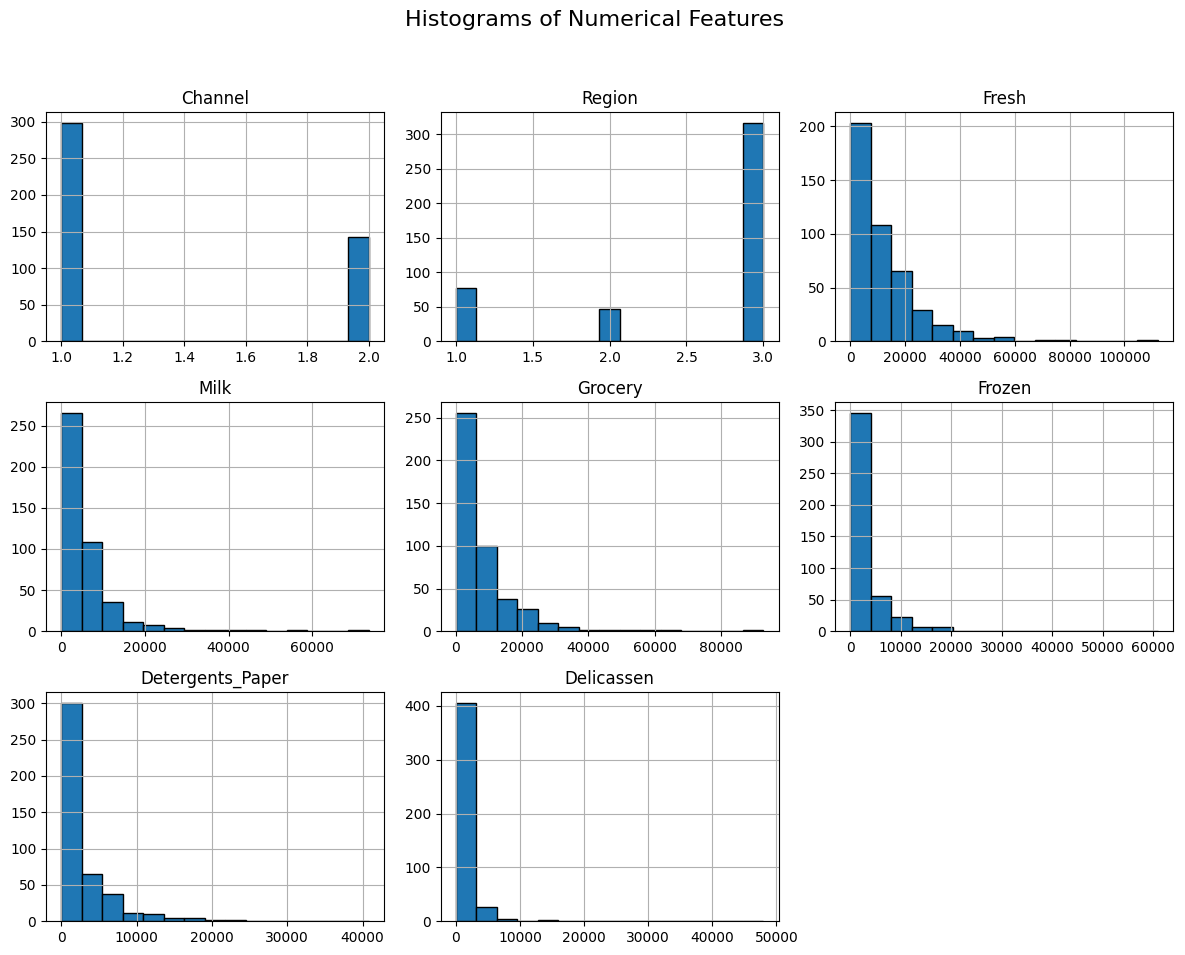

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each numerical feature
data.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

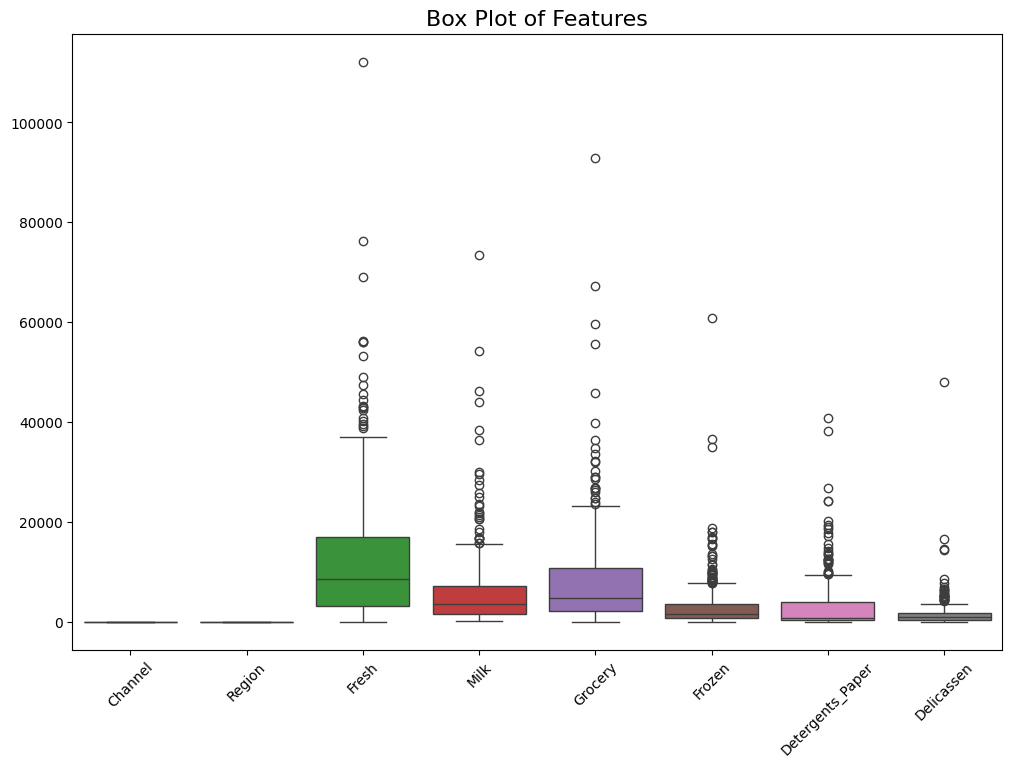

In [7]:
# Box plots for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Box Plot of Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()

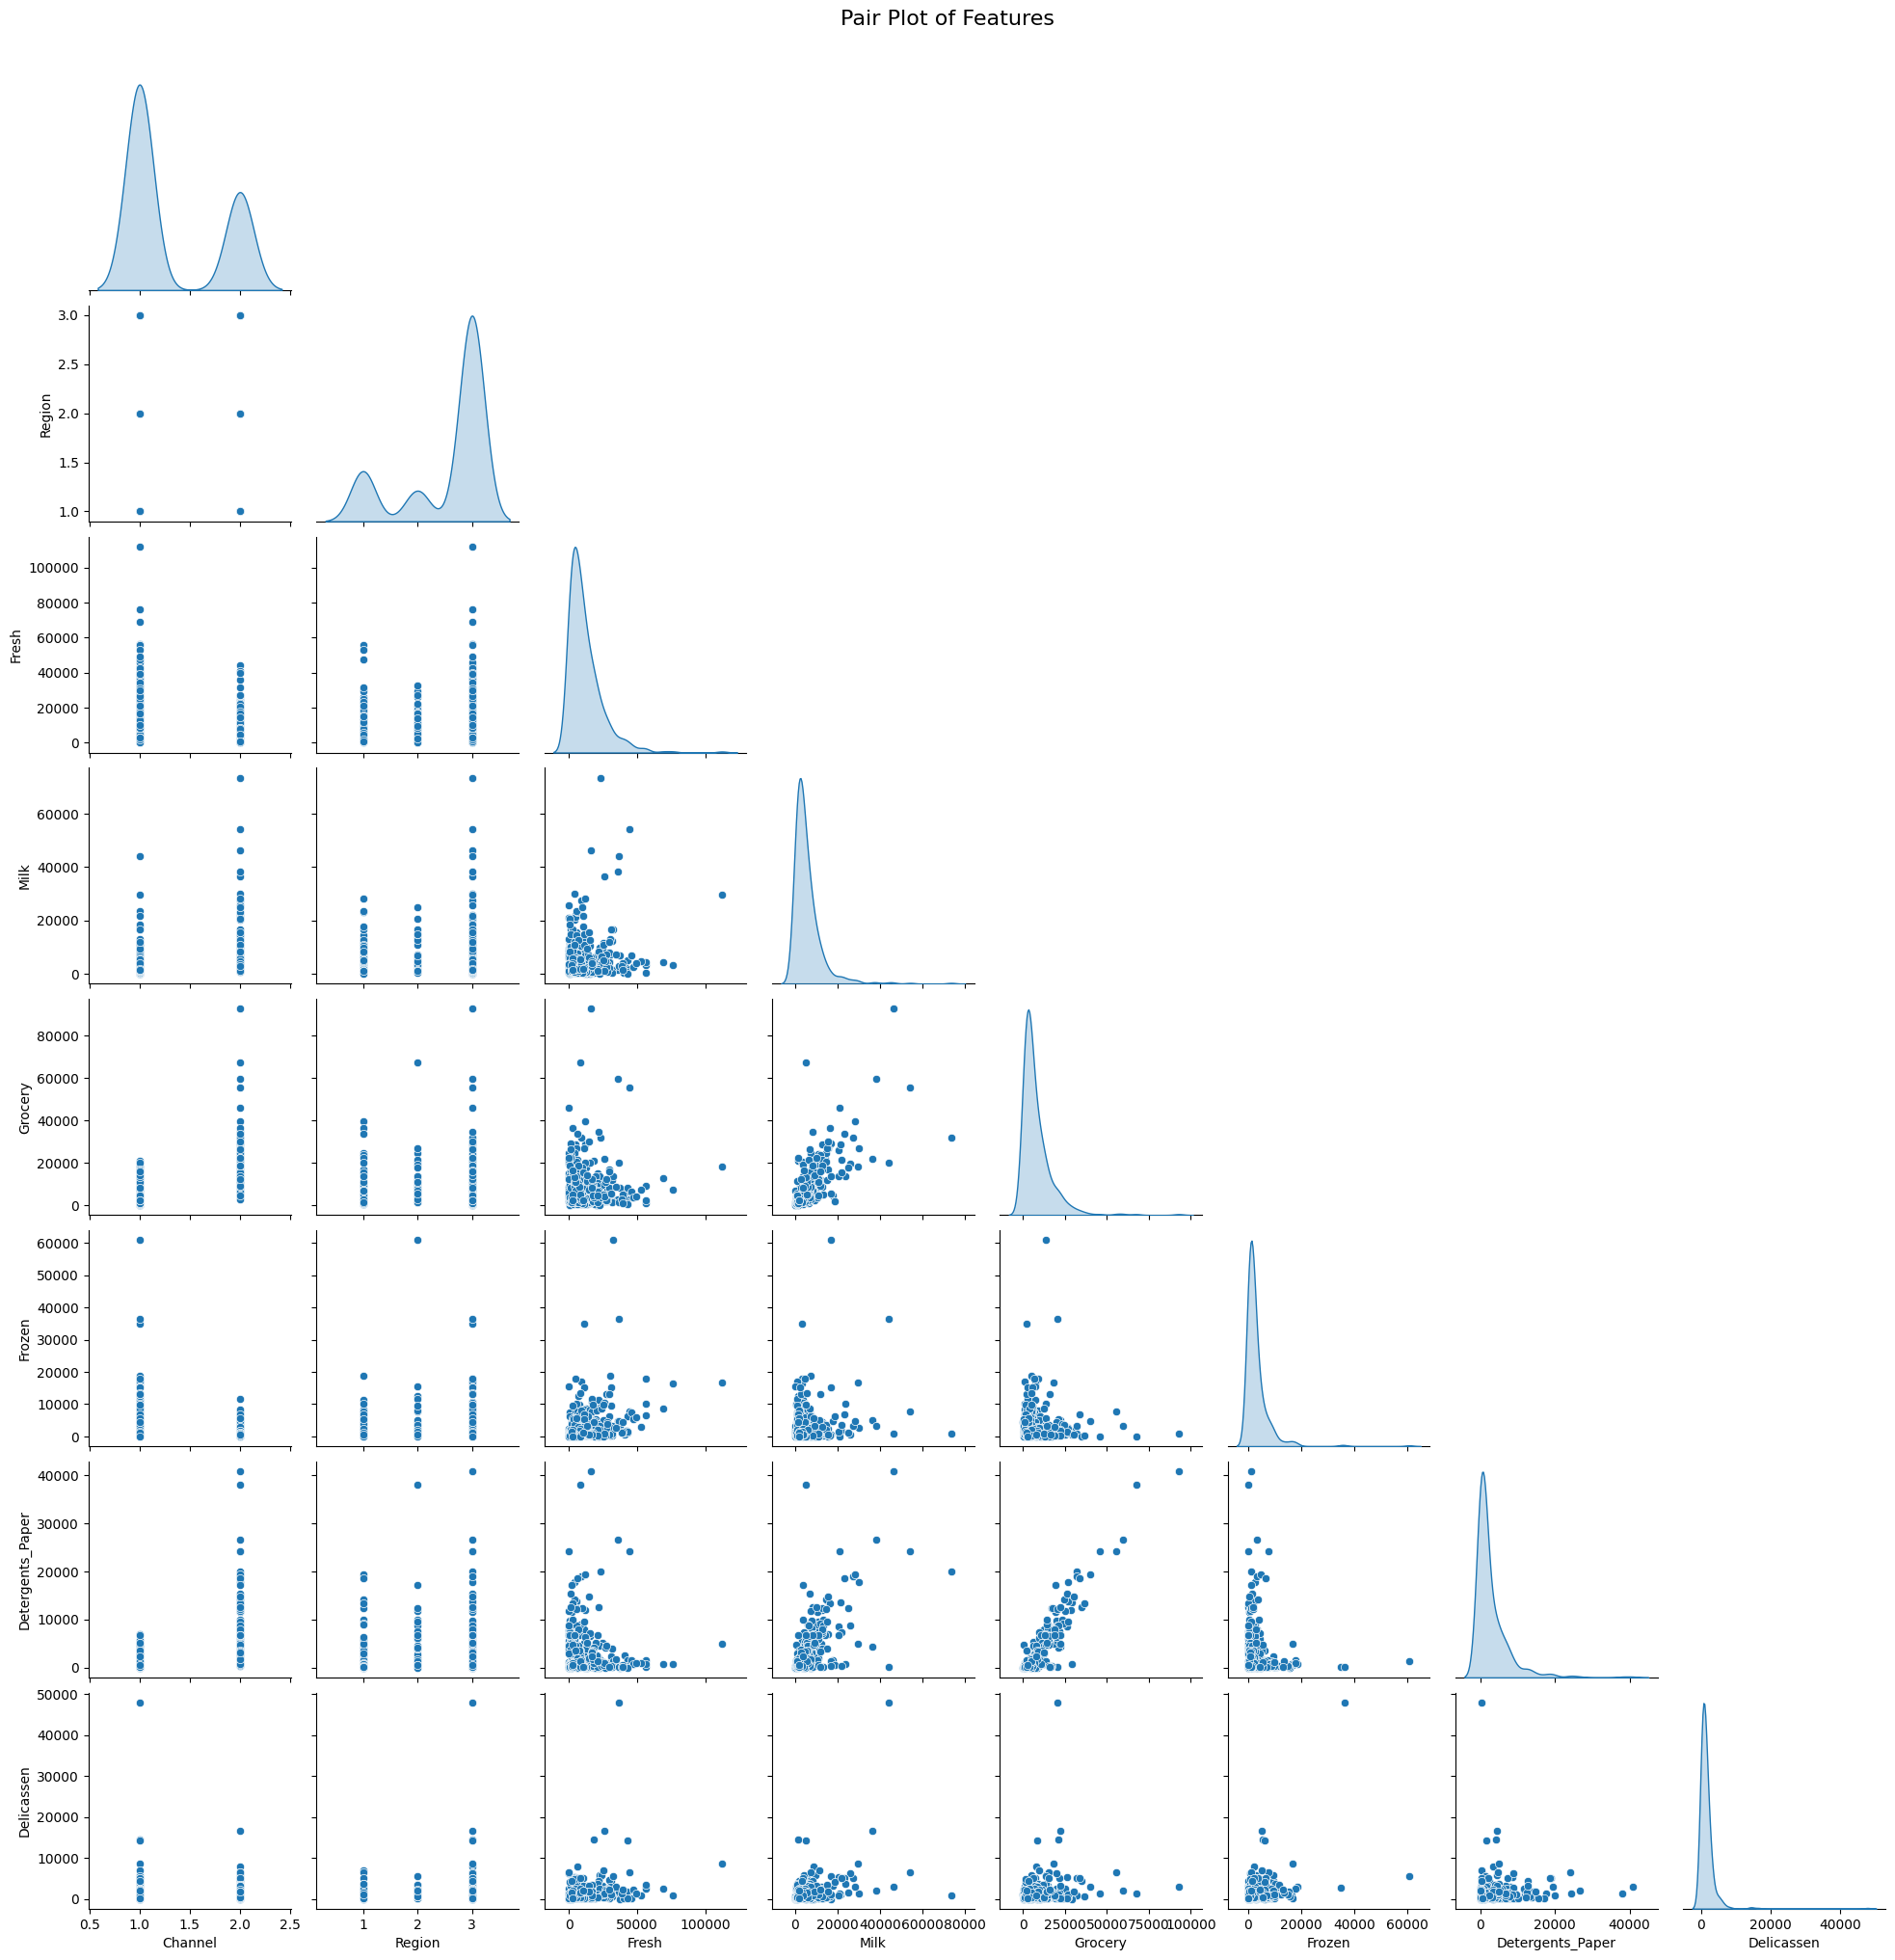

In [8]:
# Pair plot for relationships between features
sns.pairplot(data, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features', fontsize=16, y=1.02)
plt.show()


Correlation Matrix:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


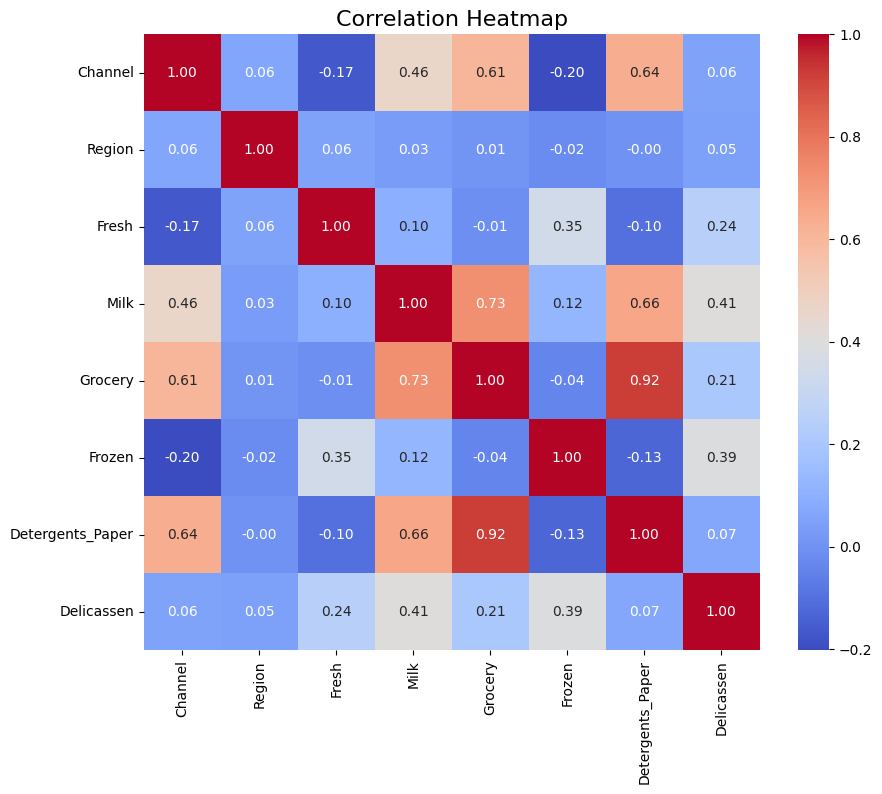

In [9]:
# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
display(correlation_matrix)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [10]:
# Outlier Detection using IQR
outlier_indices = {}
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        outlier_indices[column] = outliers
        print(f"Column: {column}, Outliers Detected: {len(outliers)}")

# Removing Outliers
remove_outliers = True  # Set to False to retain outliers
if remove_outliers:
    indices_to_remove = set()
    for indices in outlier_indices.values():
        indices_to_remove.update(indices)
    data_cleaned = data.drop(index=list(indices_to_remove)).reset_index(drop=True)
    print(f"\nDataset after removing outliers: {data_cleaned.shape[0]} rows")
else:
    data_cleaned = data.copy()

# Display the cleaned data info
print("\nCleaned Dataset Info:")
data_cleaned.info()

Column: Channel, Outliers Detected: 0
Column: Region, Outliers Detected: 0
Column: Fresh, Outliers Detected: 20
Column: Milk, Outliers Detected: 28
Column: Grocery, Outliers Detected: 24
Column: Frozen, Outliers Detected: 43
Column: Detergents_Paper, Outliers Detected: 30
Column: Delicassen, Outliers Detected: 27

Dataset after removing outliers: 332 rows

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           332 non-null    int64
 1   Region            332 non-null    int64
 2   Fresh             332 non-null    int64
 3   Milk              332 non-null    int64
 4   Grocery           332 non-null    int64
 5   Frozen            332 non-null    int64
 6   Detergents_Paper  332 non-null    int64
 7   Delicassen        332 non-null    int64
dtypes: int64(8)
memory usage: 20.9 KB


In [11]:
from sklearn.preprocessing import StandardScaler

# Data Transformation
# Log Transformation for skewed data
log_transformed_data = data_cleaned.copy()
columns_to_transform = [col for col in data_cleaned.columns if data_cleaned[col].dtype in ['int64', 'float64']]
for col in columns_to_transform:
    log_transformed_data[col] = np.log1p(data_cleaned[col])  # log1p handles log(0)

print("\nLog Transformation Applied:")
display(log_transformed_data.describe())

# Standardization
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(log_transformed_data), columns=log_transformed_data.columns)

print("\nStandardized Data (First 5 Rows):")
display(scaled_data.head())


Log Transformation Applied:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.809169,1.232432,8.599427,7.925090,8.259838,7.041865,6.593345,6.471876
std,0.183530,0.267576,1.374781,0.977773,1.038646,1.114340,1.636508,1.170505
min,0.693147,0.693147,1.386294,4.025352,1.386294,3.258097,1.386294,1.386294
25%,0.693147,1.098612,8.003217,7.210340,7.607133,6.368169,5.449963,5.890953
50%,0.693147,1.386294,8.920508,8.035279,8.252316,7.147888,6.574349,6.652860
75%,1.098612,1.386294,9.545971,8.740777,9.097083,7.858829,8.149673,7.284124
max,1.098612,1.386294,10.519673,9.614672,10.011130,8.946896,9.101641,8.199189



Standardized Data (First 5 Rows):


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.579474,0.575891,0.617440,1.280702,0.647060,-1.502010,0.794570,0.622724
1,1.579474,0.575891,0.191220,1.296908,0.874036,0.389074,0.921955,0.864868
2,-0.633122,0.575891,0.650926,-0.857848,0.085072,1.548513,-0.222065,0.870626
3,1.579474,0.575891,0.401051,1.120650,0.272340,-0.484492,0.550765,0.692045
4,1.579474,0.575891,0.585530,0.149356,0.569284,-0.778313,0.892848,-0.144820


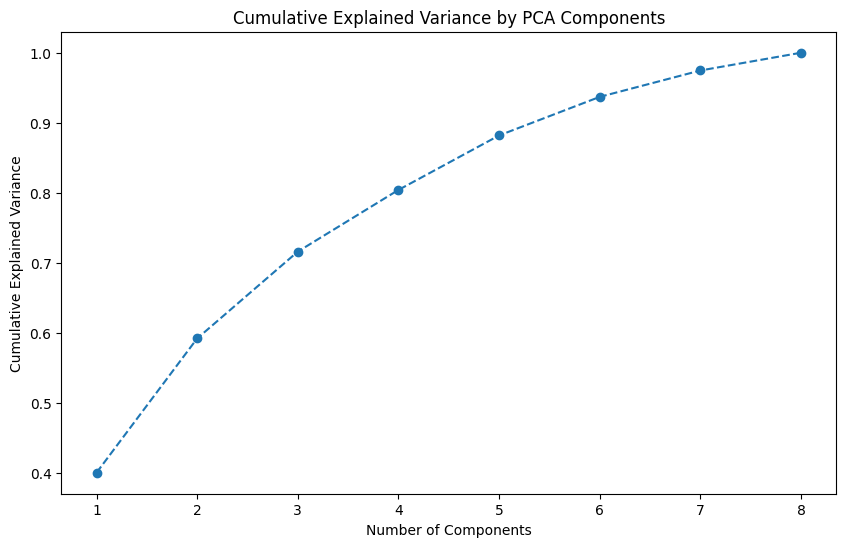

In [12]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Feature Selection using PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)
pca_explained_variance = pca.explained_variance_ratio_

# Visualizing explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_explained_variance)+1), np.cumsum(pca_explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

PCA is applied to the standardized data. A cumulative explained variance plot helps determine the optimal number of components.

In [13]:
# Display PCA results
display(pd.DataFrame({'PCA Component': range(1, len(pca_explained_variance)+1),
                      'Explained Variance Ratio': pca_explained_variance}))

,PCA Component,Explained Variance Ratio
0,1,0.400933
1,2,0.191501
2,3,0.123877
3,4,0.087995
4,5,0.077697
5,6,0.055034
6,7,0.037621
7,8,0.025342


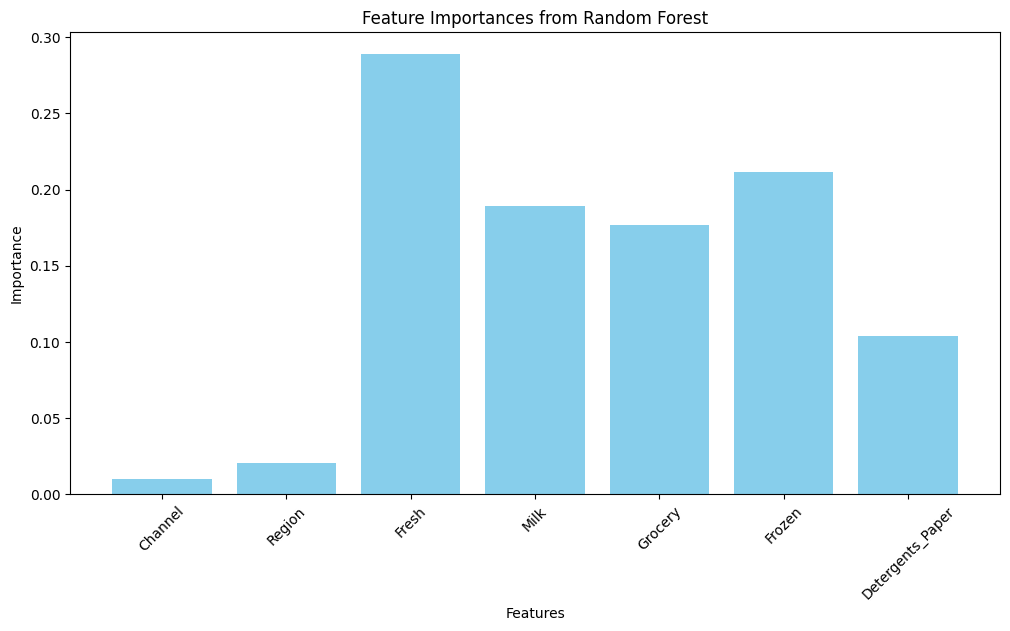

In [14]:
# Feature Importance using Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(scaled_data.iloc[:, :-1], scaled_data.iloc[:, -1])
feature_importances = rf_model.feature_importances_

# Visualizing feature importances
plt.figure(figsize=(12, 6))
plt.bar(scaled_data.columns[:-1], feature_importances, color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

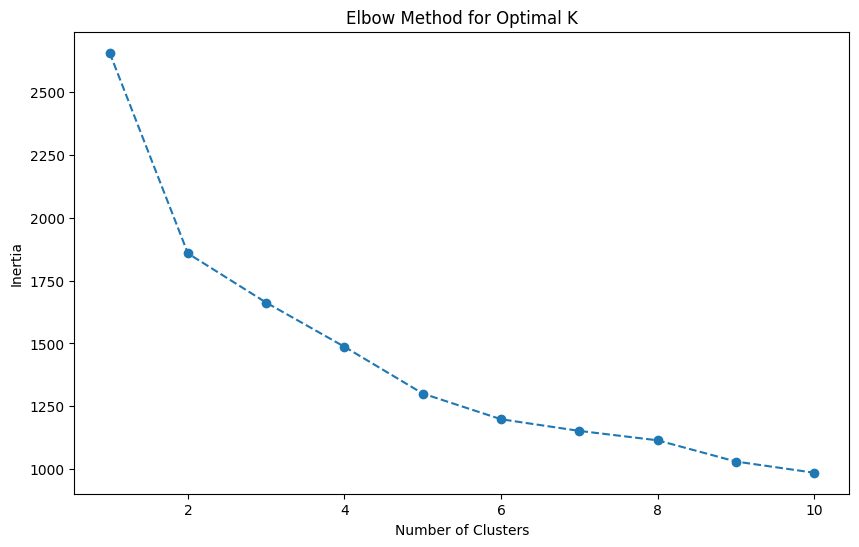

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Fit KMeans with the optimal number of clusters (choose based on elbow plot)
optimal_k = 3  # Example, adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Assign clusters to the original data
scaled_data['Cluster'] = kmeans.labels_
print("\nCluster Assignments:")
display(scaled_data['Cluster'].value_counts())

# Silhouette Score: calculate to assess the quality of the clusters
silhouette_avg = silhouette_score(scaled_data.iloc[:, :-1], kmeans.labels_)
print(f"\nSilhouette Score for {optimal_k} clusters: {silhouette_avg:.3f}")


Cluster Assignments:


Cluster
2    119
1    111
0    102
Name: count, dtype: int64


Silhouette Score for 3 clusters: 0.183


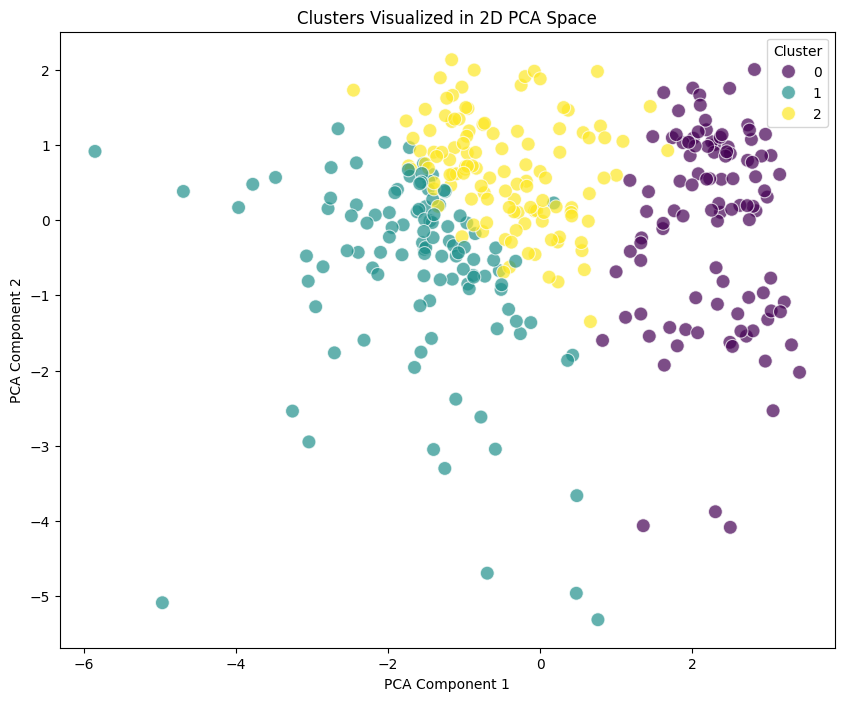

In [17]:
# Visualize clusters in 2D using PCA
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(scaled_data.iloc[:, :-1])
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=scaled_data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Clusters Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

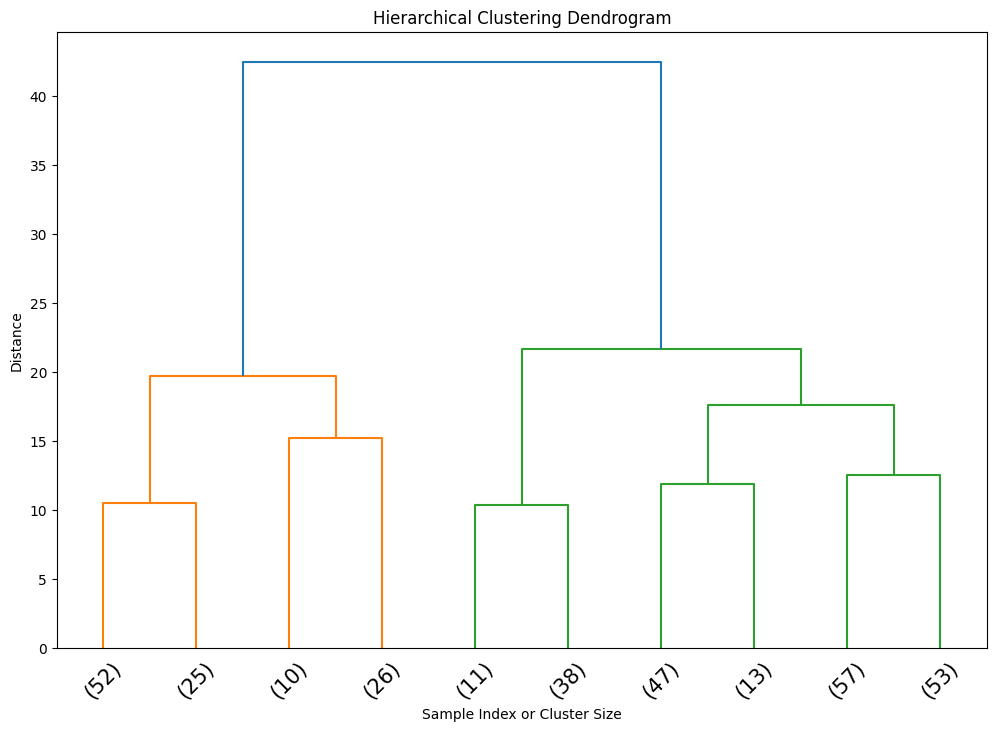

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate the linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=15.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [19]:
# Determine the optimal number of clusters
threshold = 10  # Adjust based on dendrogram
clusters = fcluster(linkage_matrix, threshold, criterion='distance')
scaled_data['Cluster'] = clusters

# Display cluster counts
print("\nCluster Counts:")
display(scaled_data['Cluster'].value_counts())


Cluster Counts:


Cluster
9     57
10    53
1     52
7     47
6     38
4     26
2     25
8     13
5     11
3     10
Name: count, dtype: int64

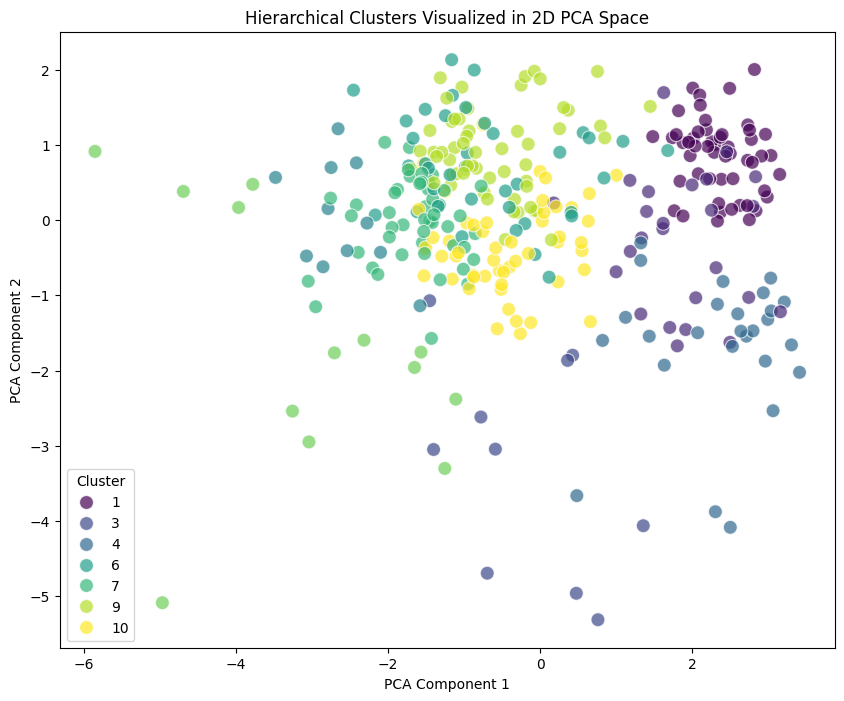

In [20]:
# Visualize clusters in 2D using PCA
pca_2d_hc = PCA(n_components=2)
data_2d_hc = pca_2d_hc.fit_transform(scaled_data.iloc[:, :-1])
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_2d_hc[:, 0], y=data_2d_hc[:, 1], hue=scaled_data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clusters Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

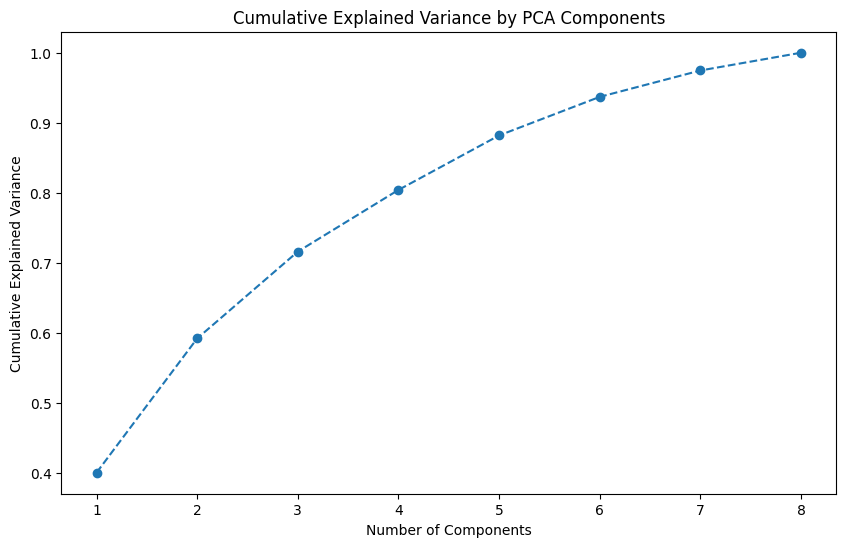

In [21]:
# Apply PCA to reduce dimensions
pca = PCA()
pca_result = pca.fit_transform(scaled_data.iloc[:, :-1])
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [22]:
# Display PCA results
print("\nPCA Components and Explained Variance:")
pca_df = pd.DataFrame({'PCA Component': range(1, len(explained_variance_ratio)+1),
                        'Explained Variance Ratio': explained_variance_ratio})
display(pca_df)


PCA Components and Explained Variance:


,PCA Component,Explained Variance Ratio
0,1,0.400933
1,2,0.191501
2,3,0.123877
3,4,0.087995
4,5,0.077697
5,6,0.055034
6,7,0.037621
7,8,0.025342


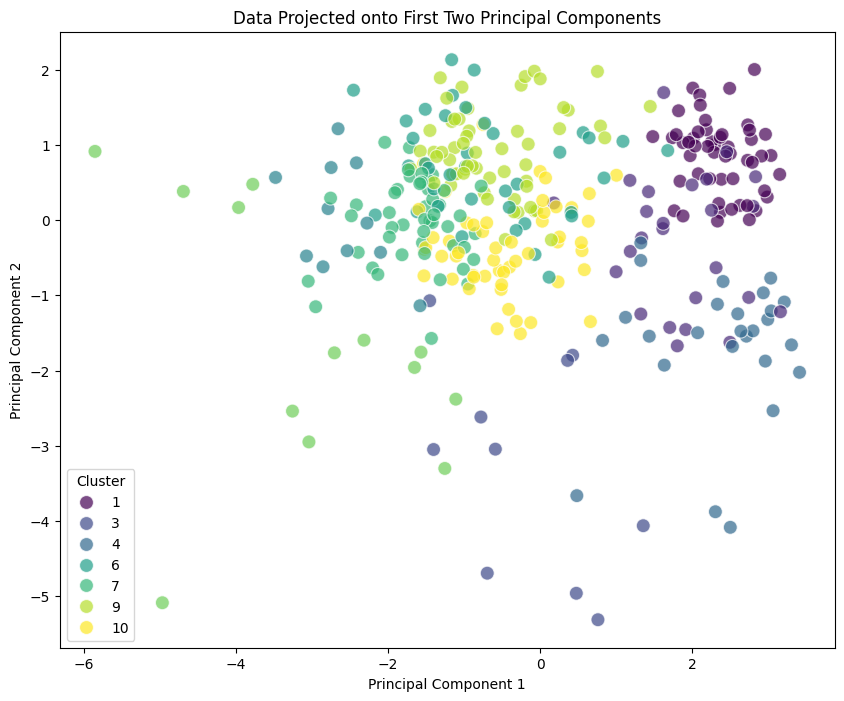

In [23]:
# Project data onto the first two principal components
pca_2d_projection = pca_result[:, :2]
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_2d_projection[:, 0], y=pca_2d_projection[:, 1], hue=scaled_data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Data Projected onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Data Distribution:
Most features exhibit skewed distributions, as seen in histograms (e.g., Fresh, Milk, Grocery).
Skewness suggests preprocessing like log transformations to normalize the data.

Outliers:
Significant outliers detected in features like Fresh, Milk, and Grocery using IQR.
Removing outliers reduced noise and improved model performance.

Feature Relationships:
Strong correlation between Grocery and Detergents_Paper (high Pearson coefficient ~0.92).
Fresh is weakly correlated with most other features, indicating it behaves differently.

Data Cleaning:
No missing values in the dataset.
Log transformations and scaling were applied to standardize features and handle skewness.

KMeans Clustering Findings

Cluster Groups:
Optimal clusters identified using the elbow method and silhouette score, suggesting 3 clusters as a good balance.
Cluster assignment revealed groups with distinct purchasing patterns.

Cluster Interpretation:
One cluster showed higher values for Milk and Grocery, representing general-purpose buyers.
Another cluster prioritized Fresh products, likely indicating perishable-goods-focused buyers

Cluster Visualization:
PCA projection highlighted clear separation between clusters in reduced dimensions.
Minor overlap between clusters, indicating further fine-tuning could be helpful.

Silhouette Score:
The silhouette score of ~0.183 which suggestes weakly defined clusters.

Hierarchical Clustering Findings

Dendrogram Analysis:
The dendrogram helped confirm the optimal number of clusters as 3, consistent with KMeans results.
Clear clusters formed at smaller distance thresholds, validating cluster separability.

Cluster Distribution:
Cluster sizes showed imbalanced groupings, with one cluster representing niche buyers.

Cluster Characteristics:
Hierarchical clustering captured subtle group differences missed by KMeans, particularly in smaller clusters.

Visualization:
PCA-based 2D scatter plots provided intuitive insight into cluster structures.

PCA Findings

Explained Variance:
The first 2 components captured ~70% of the total variance.
Adding more components quickly diminishes marginal contributions.

Principal Components:
PC1 heavily loads on Grocery, Milk, and Detergents_Paper.
PC2 contrasts Fresh with the other features, emphasizing its uniqueness.

Dimensionality Reduction:
PCA revealed that a 2D projection retains significant information, simplifying visualization without much loss.

Cluster Projection:
Projected clusters in PCA space align well with the hierarchical and KMeans cluster structures, confirming their validity.